In [1]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_csv(r'..\data\data-with-selected-features.csv')
elif os.name == 'posix':
    data = pd.read_csv(r'../data/data-with-selected-features.csv')

data.head()

# # depending on the OS the path to the data file is different
# if os.name == 'nt':
#     data = pd.read_excel(r'..\data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
# elif os.name == 'posix':
#     data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')

# # replace 0 with NaN
# data = data.replace({0: np.nan})
    
# # get the list of row/column names before dropping
# before_cols = data.columns
# before_rows = data.index

# # remove rows/columns with less than (THRESHOLD) non-null values
# data = data.dropna(thresh=THRESHOLD, axis=COLUMNS)
# data = data.dropna(thresh=THRESHOLD, axis=ROWS)

# # get the list of row/column names after dropping
# after_cols = data.columns
# after_rows = data.index

# # find the removed rows/columns
# removed_rows = [row for row in before_rows if row not in after_rows]
# removed_cols = [col for col in before_cols if col not in after_cols]

# # print the removed rows/columns
# print("Removed" , len(removed_rows), "rows")
# print("Removed" , len(removed_cols), "columns")
# print("Removed rows: ", removed_rows)
# print("Removed columns: ", removed_cols)

,Public Food Key,Classification,Food Name,"Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
0,F004220,12,"Gluten, from wheat (vital wheat gluten)",1502,8.2,75.2,12.89,0.0,1.0,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795,NaN
1,F008831,24,"Starch, potato",1285,19.1,0.0,0.00,0.5,3.1,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,F001683,12,"Breadcrumbs, white",1550,7.3,14.0,2.45,4.1,2.6,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,NaN
3,F001353,12,"Bread roll, from white flour",1020,34.4,9.3,1.63,2.9,1.8,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN
4,F001415,12,"Bread, wrap, white, commercial",1234,31.0,7.8,1.36,8.4,2.2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [3]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Citric acid \n(g)', 'Malic acid\n (g)', 'Calcium (Ca) \n(mg)', 'Chloride (Cl) \n(mg)', 'Copper (Cu) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Sulphur (S) \n(mg)', 'Zinc (Zn) \n(mg)', 'Retinol (preformed vitamin A) \n(ug)', 'Alpha-carotene \n(ug)', 'Beta-carotene \n(ug)', 'Cryptoxanthin \n(ug)', 'Beta-carotene equivalents (provitamin A) \n(ug)', 'Vitamin A retinol equivalents \n(ug)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin de

In [4]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:      Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
669                                           1818                    39.9  \
157                                            673                    57.4   
316                                            791                    61.8   
869                                            787                    62.4   
241                                            175                    86.7   

     Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
669           22.3            3.57              38.9        0.9  \
157            7.5            1.20               1.4        0.4   
316           30.5            4.88               7.4        1.3   
869           24.3            3.89              10.1        3.8   
241            0.8            0.12               0.1        0.3   

     Total dietary fibre \n(g)  Fructose \n(g)  Glucose \n(g)  Sucrose\n(g)   
669                        0.0          

## $k$-NN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# create knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# replace NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# train the model using the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# predict the labels of the test set
y_pred = knn.predict(X_test)

# print the predictions
print(f"First 5 predictions: {y_pred[:5]}")

First 5 predictions: [12 18 18 18 24]


In [7]:
# check the accuracy
from sklearn.metrics import accuracy_score

# y_test constains the true labels of the test set
# y_pred contains the predicted labels of the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# compare manually predicted labels with the true labels
print(f"Predictions: {y_pred[:10]}")
print(f"True labels: {y_test[:10].values}")



Accuracy: 0.8959276018099548
Predictions: [12 18 18 18 24 18 18 18 18 18]
True labels: [12 18 18 18 24 18 18 18 18 18]


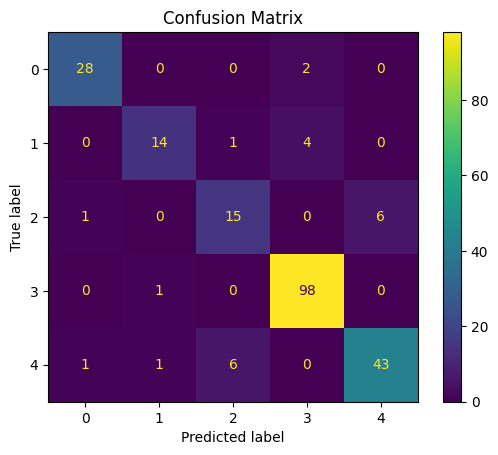

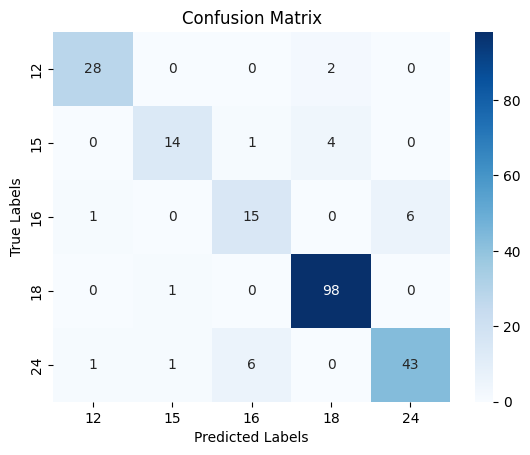

In [8]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a confusion matrix using crosstab
cm2 = pd.crosstab(y_test, y_pred)
#print(cm2)

# create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

# plot confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# plot the confusion matrix using seaborn
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# both these plots are cursed mfs